# PyCity Schools Analysis

* 
* 
* 

In [3]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# A Note On The Comparison Between "Charter" and "District" School scores.

## TODO: REWRITE THIS

The sample suggests (rather strongly) that the grading scale used by schools of type "Charter" and "District" are *distinct*.  For example, the "Charter" schools seem to only report Math sorces in the range  $[68, 100]$, where as schools of type "District" report scores in th/e range $[55,100]$.

This alone is not enough to suggest that the scales are not directly comparable.

It is only when we note that restricting to either type of school, we can say with moderate confidence, that the Math scores are drawn from a discrete unifrom distribution, 

In [5]:
# the the scores and import chi^2-test routine from scipy.stats
from scipy.stats import chisquare # import chisquare test routine


### Pearson's $\chi^2$-test results
The results of the Pearson $\chi^2$ goodness of fit test follow and provide strong evidence in support of the conclusion that the distributions' of 'math_score' conditioned on 'type' are uniform. 

In [6]:
scores = (school_data_complete.groupby('type'))['math_score'].value_counts()

# perform chi^2-test 
# (default for scipy.stats is to compare observed frequency with an appropriate uniform distribution)
charter_stat, charter_p   = chisquare( scores[('Charter',)].values )
district_stat, district_p = chisquare( scores[('District',)].values )

print(f"Charter p-value:  {charter_p:0.5}\n"
      f"District p-value: {district_p:0.5}")

Charter p-value:  0.81961
District p-value: 0.71249


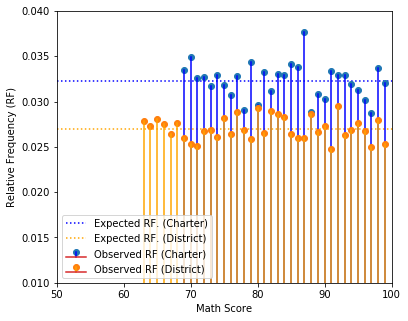

In [19]:
fig, ax = plt.subplots(1)

ax.set_xlim(50,100)
ax.set_ylim(0.01, 0.04)
ax.set_xlabel('Math Score'); ax.set_ylabel('Relative Frequency (RF)')
    
ax.stem(scores[('Charter',)].index, 
           scores[('Charter',)].values/scores[('Charter',)].sum(), 'blue',  label='Observed RF (Charter)')
ax.stem(scores[('District',)].index, 
           scores[('District',)].values/scores[('District',)].sum(), 'orange', markerfmt='C1o',  label='Observed RF (District)')

ax.hlines([ 1/len(scores[('Charter',)].index)], 50, 100, 'blue',  ':', label="Expected RF. (Charter)" )
ax.hlines([ 1/len(scores[('District',)].index)], 50, 100, 'orange', ':', label="Expected RF. (District)" )
ax.legend(loc=3)

fig.set_size_inches(6, 5)

In [16]:
scores = (school_data_complete.groupby('type'))['reading_score'].value_counts()
# perform chi^2-test 
# (default for scipy.stats is to compare observed frequency with an appropriate uniform distribution)
charter_stat, charter_p   = chisquare( scores[('Charter',)].values )
district_stat, district_p = chisquare( scores[('District',)].values )

print(f"Charter p-value:  {charter_p:0.5}\n"
      f"District p-value: {district_p:0.5}")

Charter p-value:  0.066289
District p-value: 0.015262


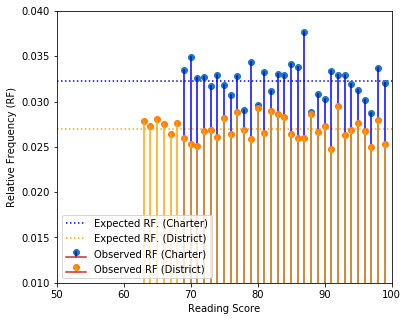

In [20]:
fig, ax = plt.subplots(1)

ax.set_xlim(50,100)
ax.set_ylim(0.01, 0.04)
ax.set_xlabel('Reading Score'); ax.set_ylabel('Relative Frequency (RF)')

ax.stem(scores[('Charter',)].index, 
           scores[('Charter',)].values/scores[('Charter',)].sum(), 'blue',  label='Observed RF (Charter)')
ax.stem(scores[('District',)].index, 
           scores[('District',)].values/scores[('District',)].sum(), 'orange', markerfmt='C1o',  label='Observed RF (District)')

ax.hlines([ 1/len(scores[('Charter',)].index)], 50, 100, 'blue',  ':', label="Expected RF. (Charter)" )
ax.hlines([ 1/len(scores[('District',)].index)], 50, 100, 'orange', ':', label="Expected RF. (District)" )
ax.legend(loc=3)
fig.set_size_inches(6, 5)

## District Summary

In [18]:
student_frag = lambda students : pd.Series(dict([ \
    ('Mean Math Score',
        students['math_score'].mean()),
    ('Mean Reading Score',
        students['reading_score'].mean()),
    ('Mean Combined Score',
        0.5*(students['math_score'] + students['reading_score']).mean()),
    ('% Passing Math', 
        len(students.loc[ students['math_score'] >= 70.0])/len(students)),
    ('% Passing Reading',
        len(students.loc[ students['reading_score'] >= 70.0])/len(students)),
    ('Mean % Passing',
        0.5*(len(students.loc[ students['math_score'] >= 70.0])/len(students) +
             len(students.loc[ students['reading_score'] >= 70.0])/len(students)))
]))

frag = lambda school :  pd.Series(dict([
    ('Total Schols',
        school['school_name'].count()), 
    ('Total Students',
        school['size'].sum()),
    ('Total Budget', 
        school['budget'].sum()) ]))

district_summary = frag(school_data).append(student_frag(student_data)).to_frame().transpose()

In [80]:
district_summary

,Total Schols,Total Students,Total Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
0,15.0,39170.0,24649428.0,78.985371,81.87784,80.431606,0.749809,0.858055,0.803932


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

In [117]:
schools = school_data_complete.groupby(
    ['school_name', 'type', 'size', 'budget'])

frag = lambda school: pd.Series(dict([
    ('School Name',
        school['school_name']),
    ('School Type',
        school['type']),
    ('Total Students',
        school['size']),
    ('Total School Budget',
        school['budget']),
    ('Per Student Budget',
        school['budget']/school['size'])
]))

raw_right = schools.apply(student_frag) 
raw_left  = raw_right.index.to_frame().apply(frag, axis=1)

school_summary = pd.merge(raw_left, raw_right, 
                          left_index=True, right_index=True).set_index('School Name')


In [122]:
school_summary.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Name,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,79.041198,0.666801,0.819333,0.743067
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,83.518837,0.941335,0.970398,0.955867
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,78.934893,0.659885,0.807392,0.733639
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,78.924425,0.683096,0.792990,0.738043
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,83.584128,0.933924,0.971390,0.952657


 ## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [123]:
school_summary.sort_values(by='Mean % Passing', ascending=False)

,School Type,Total Students,Total School Budget,Per Student Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Name,,,,,,,,,,
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,83.518837,0.941335,0.970398,0.955867
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,83.633639,0.932722,0.973089,0.952905
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,83.942308,0.945946,0.959459,0.952703
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,83.584128,0.933924,0.971390,0.952657
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,83.631844,0.938677,0.965396,0.952037
Wright High School,Charter,1800,1049400,583.0,83.682222,83.955000,83.818611,0.933333,0.966111,0.949722
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,83.542589,0.938671,0.958546,0.948609
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,83.809133,0.925059,0.962529,0.943794
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,79.041198,0.666801,0.819333,0.743067


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

* Perform the same operations as above for reading scores

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [17]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


## Scores by School Size

* Perform the same operations as above, based on school size.

In [ ]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

* Perform the same operations as above, based on school type.

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757
